In [6]:
import numpy as np
from scipy.stats import nbinom, rv_discrete, rv_continuous, norm
import matplotlib.pyplot as plt
from typing import List, Union

In [2]:
def conflate_discrete_distributions(distributions: List[rv_discrete], support: np.ndarray) -> np.ndarray:

    running_product = np.ones_like(support, dtype=float)
    for distribution in distributions:
        running_product *= distribution.pmf(support)

    return running_product / running_product.sum()

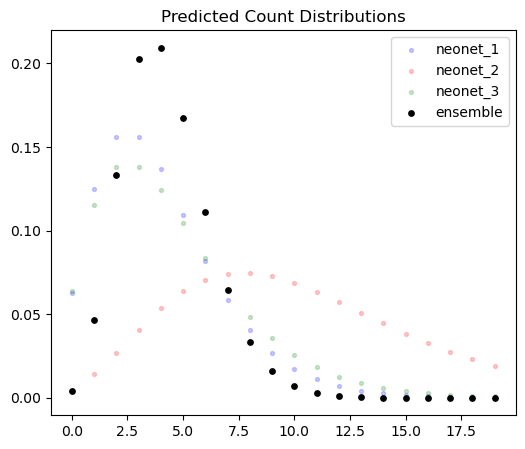

In [3]:
# Predicted n, p from three neonets.

n_vals = [4, 4.5, 3]
p_vals = [0.5, 0.3, 0.4]

neonet_1 = nbinom(n=n_vals[0], p=p_vals[0])
neonet_2 = nbinom(n=n_vals[1], p=p_vals[1])
neonet_3 = nbinom(n=n_vals[2], p=p_vals[2])

support = np.arange(0, 20)

fig, ax = plt.subplots(1, 1, figsize=(6, 5))
ax.set_title("Predicted Count Distributions")
ax.scatter(support, neonet_1.pmf(support), color='blue', marker='o', alpha=0.2, s=8, label='neonet_1')
ax.scatter(support, neonet_2.pmf(support), color='red', marker='o', alpha=0.2, s=8, label='neonet_2')
ax.scatter(support, neonet_3.pmf(support), color='green', marker='o', alpha=0.2, s=8, label='neonet_3')
ax.scatter(support, conflate_discrete_distributions([neonet_1, neonet_2, neonet_3], support), color='black', marker='o', s=15, label='ensemble')
ax.legend()

plt.show()

In [4]:
def conflate_continous_distributions(distributions: List[rv_discrete], support: np.ndarray) -> np.ndarray:

    running_product = np.ones_like(support, dtype=float)
    for distribution in distributions:
        running_product *= distribution.pdf(support)

    return running_product / running_product.sum()

In [41]:
means = [13, 12, 20]
sigs = [1.5, 5.0, 3.0]

support = np.linspace(0, 40, 200)

In [42]:
neonet_1 = norm(loc=means[0], scale=sigs[0])
neonet_2 = norm(loc=means[1], scale=sigs[1])
neonet_3 = norm(loc=means[2], scale=sigs[2])

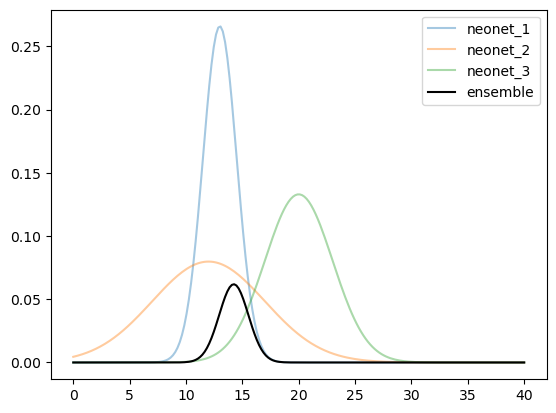

In [43]:
plt.plot(support, neonet_1.pdf(support), alpha=0.4, label='neonet_1')
plt.plot(support, neonet_2.pdf(support), alpha=0.4, label='neonet_2')
plt.plot(support, neonet_3.pdf(support), alpha=0.4, label='neonet_3')
plt.plot(support, conflate_continous_distributions([neonet_1, neonet_2, neonet_3], support), color='black', label='ensemble')

plt.legend()
plt.show()